In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

In [54]:
# Create pandas dataframe from csv
df = pd.read_csv("../program/log/MainLogWithTarjan.csv", sep=",", header=0)

# Filter
df = df[df['verified'] == True]
df = df[df['millis'] < 30000]

# Mean
mean = df.groupby('k').mean()

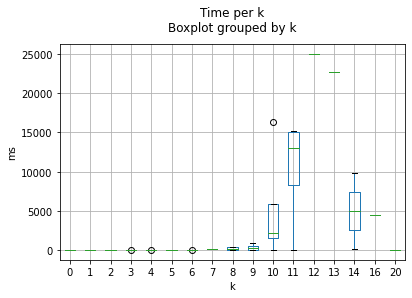

In [55]:
df.boxplot(column='millis', by='k')
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k', y=1.1)
plt.savefig('plots/TimeBoxPlotWithTarjan.png',  bbox_inches='tight')

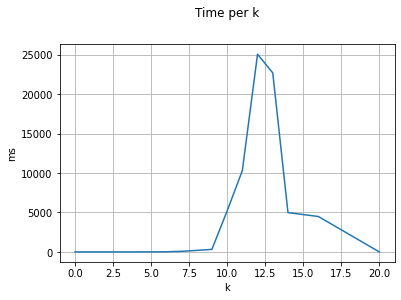

In [56]:
plt.plot(mean.index, mean['millis'])
plt.xlabel('k')
plt.ylabel('ms')
plt.title('Time per k', y=1.1)
plt.grid()
plt.savefig('plots/TimePlot.png',  bbox_inches='tight')
plt.show()

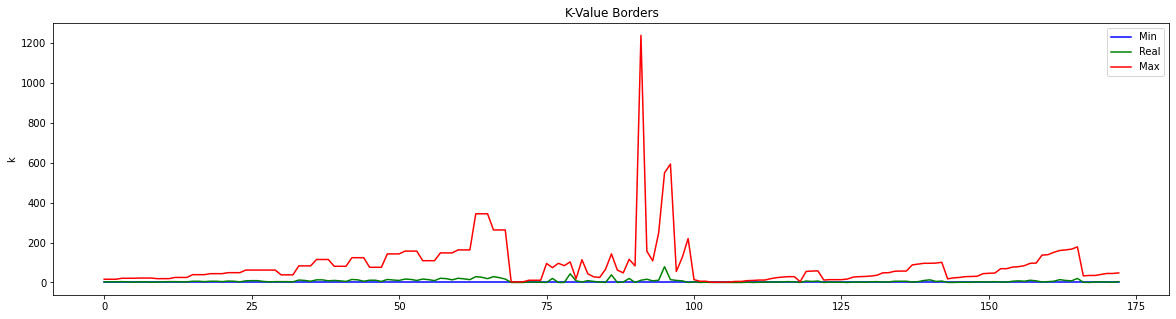

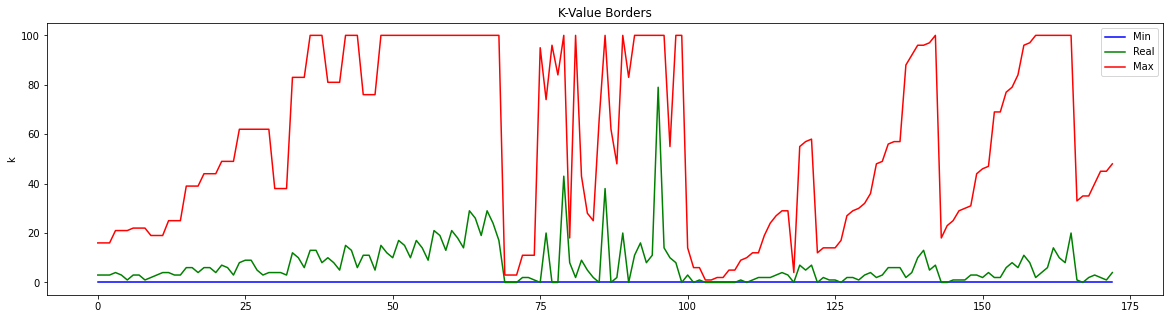

In [57]:
# Create pandas dataframe from csv
dfK = pd.read_csv("../program/log/OverviewMinMaxK.csv", sep=",", header=0)

plt.figure(figsize=(20,5))
plt.plot(dfK["min"], c = 'blue', label="Min")
plt.plot(dfK["real"], c = 'green', label="Real")
plt.plot(dfK["max"], c = 'red', label="Max")
plt.title('K-Value Borders')
plt.ylabel('k')
plt.legend()
plt.savefig('plots/MinMaxKPlot.png',  bbox_inches='tight')
plt.show()

dfK['max'] = dfK['max'].where(dfK['max'] <= 100, 100)

plt.figure(figsize=(20,5))
plt.plot(dfK["min"], c = 'blue', label="Min")
plt.plot(dfK["real"], c = 'green', label="Real")
plt.plot(dfK["max"], c = 'red', label="Max")
plt.title('K-Value Borders')
plt.ylabel('k')
plt.legend()
plt.savefig('plots/MinMaxKPlotClipped.png',  bbox_inches='tight')
plt.show()